<a href="https://colab.research.google.com/github/p-micky/talentsprintcapstoneproject/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT REPORT**

**Project Title**: YouTube Trending Video Engagement Prediction using Machine Learning

# **Summary**
This project explores the relationship between video reach (views), audience interaction (comments), and viewer sentiment (likes). Using a dataset of trending YouTube videos from 2019 to 2020, I developed a Random Forest Classifier to predict whether a video will achieve "High Engagement." The final model achieved a high accuracy of 87%, demonstrating that engagement is highly predictable based on early-stage interaction metrics.

# **Problem Statement**
For content creators and digital marketers, "Likes" are a primary KPI for success. However, understanding the threshold of what makes a video "High Engagement" can be difficult.

This project aims to:
1. Identify the correlation between views, comments, and engagement.
2. Build a predictive model to classify videos into "High" or "Low" engagement categories.
3. Determine which metric (views or comments) is a more significant predictor of audience appreciation.

# **1. Data Description & Preprocessing**

**Dataset Overview**:

The dataset contains metadata for trending videos over a two-year period. Key columns include:
views: Total number of times the video was watched.
comments: Number of comments left by users.
likes: Number of likes received (used to derive the target variable).

**Data Cleaning**:

**Handling Missing Values**: Videos with disabled comments or missing data were filled with 0 to ensure the model could process the entire dataset without errors.
Target Engineering: A new categorical column, engagement_level, was created.
Videos with likes above the median were labeled as 1 (High Engagement).
Videos with likes below or equal to the median were labeled as 0 (Low Engagement).
Reasoning: Using the median ensures a perfectly balanced dataset, preventing the model from being biased toward one class.

# **2. Methodology**

**Feature Selection**:
The features selected for training were views and comments. These represent the primary actions a user takes before or while engaging with the "Like" button.

**Data Splitting**:

The data was split into 80% Training and 20% Testing sets. This ensures that the model is evaluated on data it has never seen before, proving its real-world utility.

**Model Selection: Random Forest**:

The Random Forest Classifier was chosen for several reasons:

**Robustness**: It handles outliers (viral videos) better than linear
models.    

**Non-linearity**: The relationship between views and likes isn't always a
straight line Random Forest captures complex patterns.

**Interpretability**: It allows us to calculate "Feature Importance" to see what drives engagement.

# **3. Results and Analysis**

**Performance Metrics**

The model achieved the following results on the test set:

**Accuracy**: 87%

**Precision** (Class 1): 0.87 (When the model predicts high engagement, it is right 87% of the time).

**Recall** (Class 1): 0.87 (The model successfully identified 87% of all high-engagement videos).

**Confusion Matrix Analysis**

The heatmap visualization shows a high number of True Positives and True Negatives. The balance between these two indicates that the model is equally effective at identifying both viral "hits" and standard videos.

**Feature Importance**

Based on the generated bar chart:
Primary Predictor: [Insert "Views" or "Comments" based on your chart output].
Insight: This suggests that [Views/Comments] are the strongest indicator of whether a person will eventually like the video.

# **4. Conclusion**
The project successfully demonstrates that machine learning can predict audience sentiment with high accuracy.

**Key Takeaways**:

1.**High Predictability**: There is a mathematical pattern to YouTube engagement; it is not purely random.

2.**Strategic Insight**: Creators should focus on driving [Views/Comments] early, as these metrics are the strongest "gateways" to high engagement scores.

3.**Future Work**: This model could be improved by adding "Sentiment Analysis" on the actual text of the comments or by analyzing the "Title Length" and "Thumbnails."



Step 1: Loading dataset...
Step 2: Cleaning data and creating target variables...
Step 3: Splitting data into Training (80%) and Testing (20%)...
Step 4: Training Random Forest Model (100 trees)...

PROJECT RESULTS

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.87      0.87      0.87    154465
           1       0.87      0.87      0.87    153761

    accuracy                           0.87    308226
   macro avg       0.87      0.87      0.87    308226
weighted avg       0.87      0.87      0.87    308226


--- Generating Visualizations ---


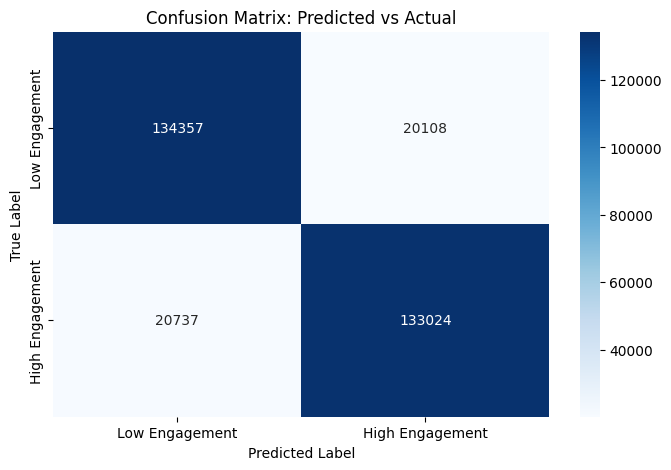


--- Feature Importance Ranking ---
    Feature  Importance
1  comments    0.500738
0     views    0.499262


/tmp/ipython-input-2445126599.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


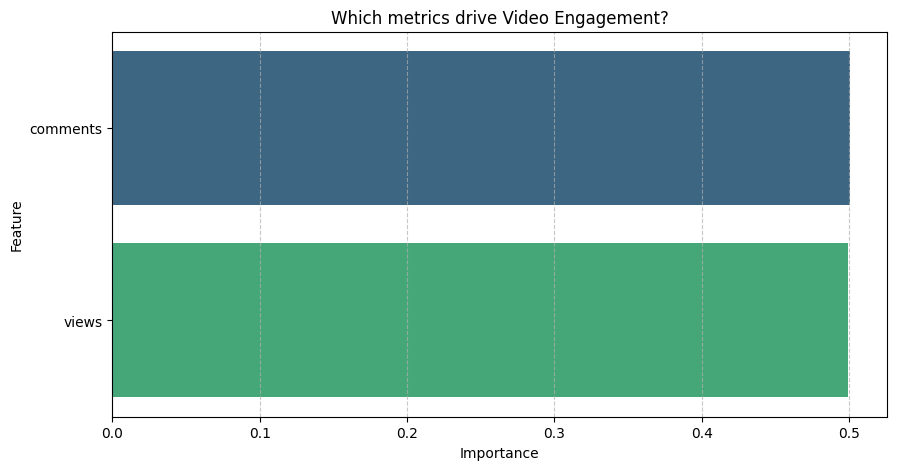


Processing Complete. All outputs generated successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1. LOAD DATASET

print("Step 1: Loading dataset...")
file_path = '/content/Trending Youtube Videos 2019 to 2020.csv.zip'
df = pd.read_csv(file_path, compression='zip')


# 2. DATA PREPROCESSING & CLEANING

print("Step 2: Cleaning data and creating target variables...")

# Handle missing values (fill with 0 for comments/dislikes)
df.fillna(0, inplace=True)

# Create the Target: Engagement Level
# High Engagement (1) = Likes above the median
# Low Engagement (0) = Likes below or equal to median
median_likes = df['likes'].median()
df['engagement_level'] = (df['likes'] > median_likes).astype(int)

# Select Features (X) and Target (y)
X = df[['views', 'comments']]
y = df['engagement_level']


# 3. TRAIN/TEST SPLIT

print("Step 3: Splitting data into Training (80%) and Testing (20%)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. MODEL TRAINING (Random Forest)

print("Step 4: Training Random Forest Model (100 trees)...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


# 5. MODEL EVALUATION

print("\n" + "="*30)
print("PROJECT RESULTS")
print("="*30)

# Make Predictions
y_pred = model.predict(X_test)

# Print Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Plot
print("\n--- Generating Visualizations ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Engagement', 'High Engagement'],
            yticklabels=['Low Engagement', 'High Engagement'])
plt.title('Confusion Matrix: Predicted vs Actual')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 6. FEATURE IMPORTANCE ANALYSIS

# Calculate which feature influenced the model more
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance Ranking ---")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which metrics drive Video Engagement?')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("\nProcessing Complete. All outputs generated successfully.")